In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exploratory Data Analysis

## The introduction

Let's start this challange by inspecting our Dataset, regarding:
- Data Types
- Dataset Variables (Continuous/Discrete or Categorical)
- Size and Shape
- Missing and Dupicates Verification

In [302]:
df = pd.read_csv('accounting_dataset.csv')

In [303]:
df.head()

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
0,288203,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular
1,324441,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,133537,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
3,331521,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular
4,375333,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533009 entries, 0 to 533008
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   BELNR   533009 non-null  int64  
 1   WAERS   533009 non-null  object 
 2   BUKRS   533009 non-null  object 
 3   KTOSL   533009 non-null  object 
 4   PRCTR   533009 non-null  object 
 5   BSCHL   533009 non-null  object 
 6   HKONT   533009 non-null  object 
 7   DMBTR   533009 non-null  float64
 8   WRBTR   533009 non-null  float64
 9   label   533009 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 40.7+ MB


In [305]:
df.shape

(533009, 10)

In [306]:
df.isna().sum().sum()

0

In [307]:
df[df.duplicated()]

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label


- Nice Dataset! There are neither missing or duplicates in it.
- There are not many variables (only 9 as said in the prior pdf)
- Several categorical feature and few continuous ones
- Half million records seems great! :D

## Data Understanding

Let's gain some knowledge about the data and the problem itselt.
This is one of the most crucial phases of the challenge.
In this phase I like to make some aggregations over categorical data, and after that plot some visual graphs and check the distributions, correlations and try to find some patterns.

### Continuous Variables

- statistical descriptives about the continuous data
- look for outliers
- check data distribution

In [308]:
df[['DMBTR','WRBTR']].describe()

,DMBTR,WRBTR
count,5.330090e+05,5.330090e+05
mean,9.226683e+05,6.226000e+04
std,2.152291e+06,8.117304e+05
min,2.600000e+00,0.000000e+00
25%,2.159392e+05,0.000000e+00
50%,4.864455e+05,0.000000e+00
75%,9.752580e+05,2.631600e+04
max,9.244554e+07,5.958506e+07


<AxesSubplot:>

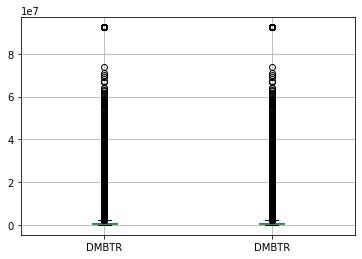

In [309]:
df.boxplot(column=['DMBTR', 'DMBTR']) 

In [313]:
Q1 = df[['DMBTR','WRBTR']].quantile(0.25)
Q3 = df[['DMBTR','WRBTR']].quantile(0.75)
IQR = Q3 - Q1

In [312]:
# Let's count outliers for each continuous variable
((df[['DMBTR','WRBTR']] < (Q1 - 1.5 * IQR)) | (df[['DMBTR','WRBTR']] > (Q3 + 1.5 * IQR))).sum()

DMBTR    39835
WRBTR    79920
dtype: int64

In [314]:
outliers = ((df[['DMBTR','WRBTR']] < (Q1 - 1.5 * IQR)) | (df[['DMBTR','WRBTR']] > (Q3 + 1.5 * IQR)))

In [315]:
outliers_DMBTR = list(outliers[outliers['DMBTR'] == True].index)
outliers_WRBTR = list(outliers[outliers['WRBTR'] == True].index)

In [316]:
len(outliers_WRBTR)

79920

In [317]:
outliers_idx_lst = outliers_WRBTR.copy()

In [318]:
# Get list of all continuous variables outliers
count = 0

for outlier_index in outliers_DMBTR:
    if outlier_index not in outliers_WRBTR:
        outliers_idx_lst.append(outlier_index)
    else:
        count+1

In [319]:
len(outliers_WRBTR)

79920

In [320]:
df.iloc[outliers_idx_lst].head(20)

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
1,324441,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,133537,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
5,327203,C1,C15,C6,C68,A1,B2,357627.56,704520.00,regular
6,292545,C4,C47,C2,C28,A2,B3,955576.84,128328.00,regular
11,226522,C1,C12,C1,C16,A1,B1,535235.52,126694.01,regular
47,445876,C2,C20,C1,C15,A1,B1,572966.69,80630.00,regular
50,367085,C1,C16,C1,C12,A1,B1,1215780.93,253276.43,regular
57,219523,C1,C14,C1,C10,A1,B1,489726.59,198334.00,regular
58,25899,C1,C11,C1,C15,A1,B1,291486.27,76483.00,regular
82,52055,C3,C33,C1,C15,A3,B1,380530.65,380380.00,regular


In [321]:
df.iloc[outliers_idx_lst]
sum((df.iloc[outliers_idx_lst]['label'] == 'global'))

70

In [322]:
sum((df.iloc[outliers_idx_lst]['label'] == 'local'))

0

In [323]:
sum(df.iloc[outliers_idx_lst]['label'] == 'regular')

113181

- Seems like an highly unbalanced dataset
- All of the global anomalies have 'anomalous' values of amount values
- No local anomalies with outliers

Time to check de distributions! (We will probably have long tails due to high valued outliers)

<AxesSubplot:ylabel='Frequency'>

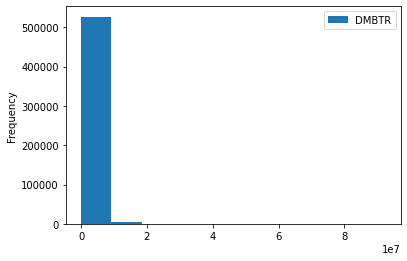

In [324]:
df[['DMBTR']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

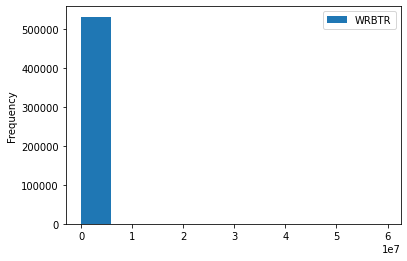

In [325]:
df[['WRBTR']].plot.hist()

In [366]:
df_without_outliers = df[['DMBTR','WRBTR']].copy()

In [375]:
lower_vals = (df_without_outliers < (Q1 - (1.5 * IQR)))
upper_vals = (df_without_outliers > (Q3 + (1.5 * IQR)))

In [376]:
df_without_outliers = df_without_outliers.mask(lower_vals, Q1, axis=1)
df_without_outliers = df_without_outliers.mask(upper_vals, Q3, axis=1)
df_without_outliers.shape

(533009, 2)

<AxesSubplot:ylabel='Frequency'>

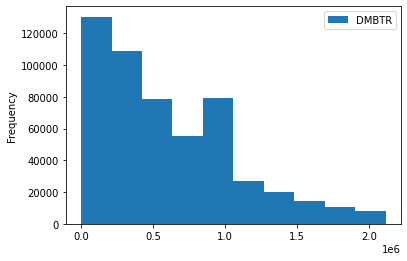

In [377]:
df_without_outliers[['DMBTR']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

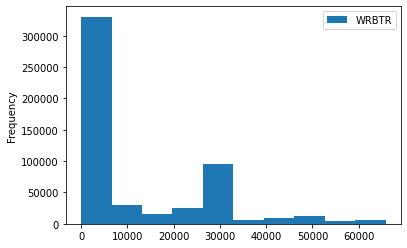

In [378]:
df_without_outliers[['WRBTR']].plot.hist()

They still have a slight kurtosis. Let's try a log transform to take care of that!

/Users/diogoalves/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot:ylabel='Frequency'>

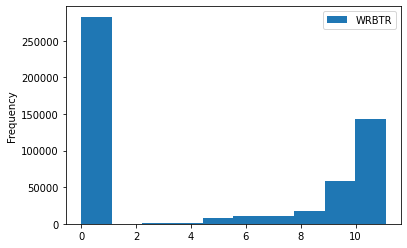

In [379]:
test_WRBTR = np.log(df_without_outliers[['WRBTR']])
test_WRBTR.replace([np.inf, -np.inf], 0, inplace=True)
test_WRBTR.plot.hist()

<AxesSubplot:ylabel='Frequency'>

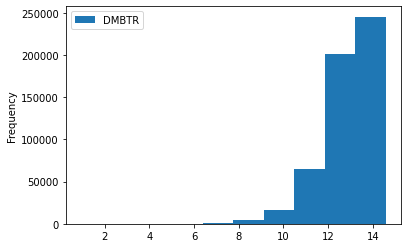

In [380]:
test_DMBTR = np.log(df_without_outliers[['DMBTR']])
test_DMBTR.replace([np.inf, -np.inf], 0, inplace=True)
test_DMBTR.plot.hist()

A log transform didn't improve much of the normal distribution... It will probably be better to use the untransformed ones.
What about the correlation between them?

In [381]:
df_without_outliers[['DMBTR','WRBTR']].corr()

,DMBTR,WRBTR
DMBTR,1.000000,0.032223
WRBTR,0.032223,1.000000


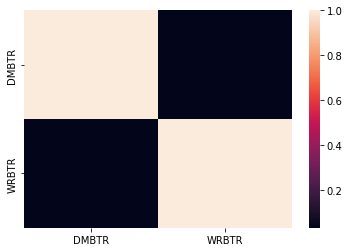

In [384]:
ax = sns.heatmap(df_without_outliers[['DMBTR','WRBTR']].corr())

The continuous features are not correlated at all. That's a good thing since multicolinearity is a problem for several ML Models.
Now it's time to inspect the categorical features!

### Categorical Variables 

Regarding Categorical Features, I like to start the analysis aggregating some data in order to understand some patterns.

In [400]:
categorical_variables = df[['WAERS','BUKRS','KTOSL','PRCTR','BSCHL','HKONT']]

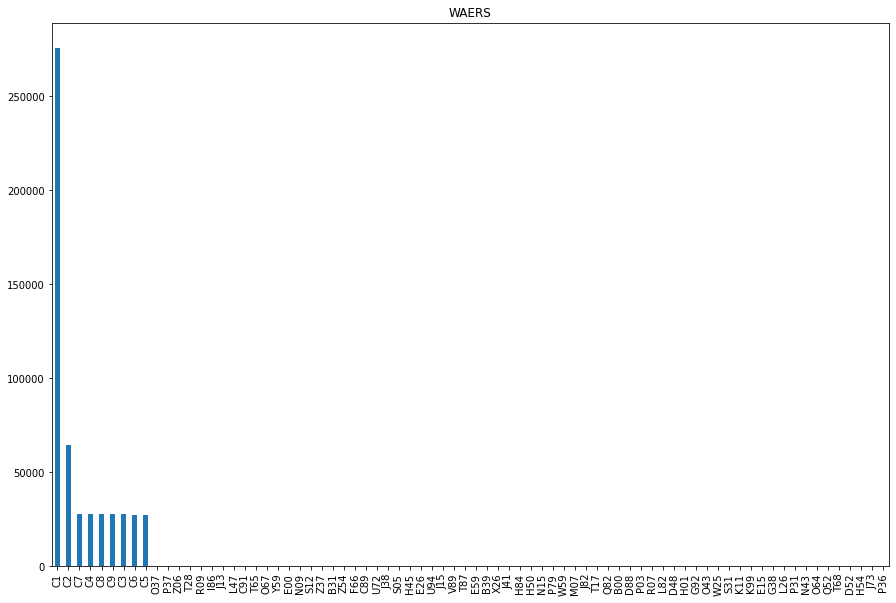

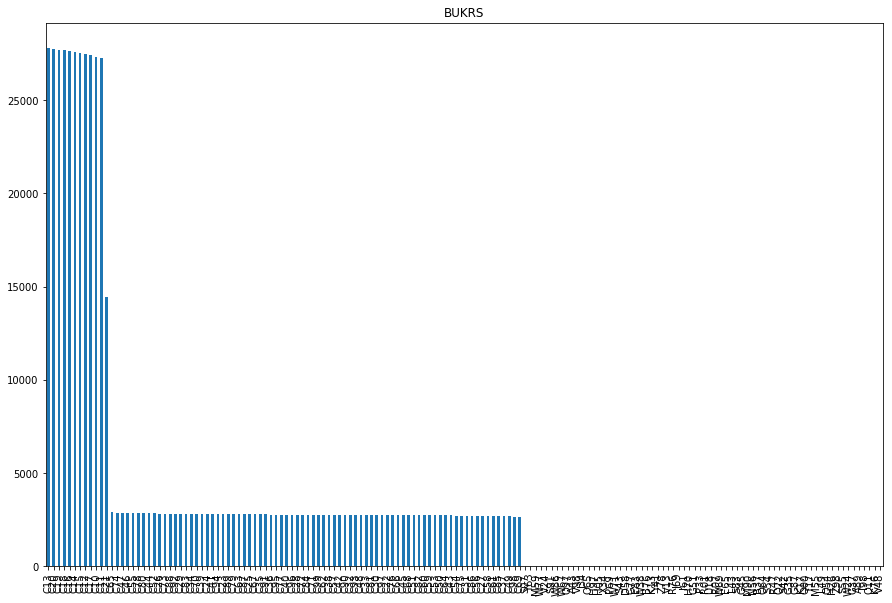

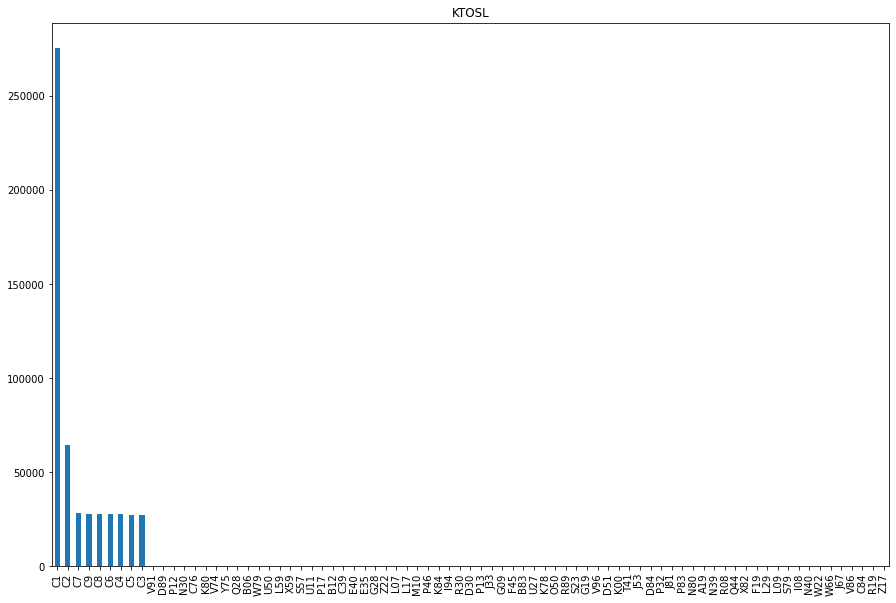

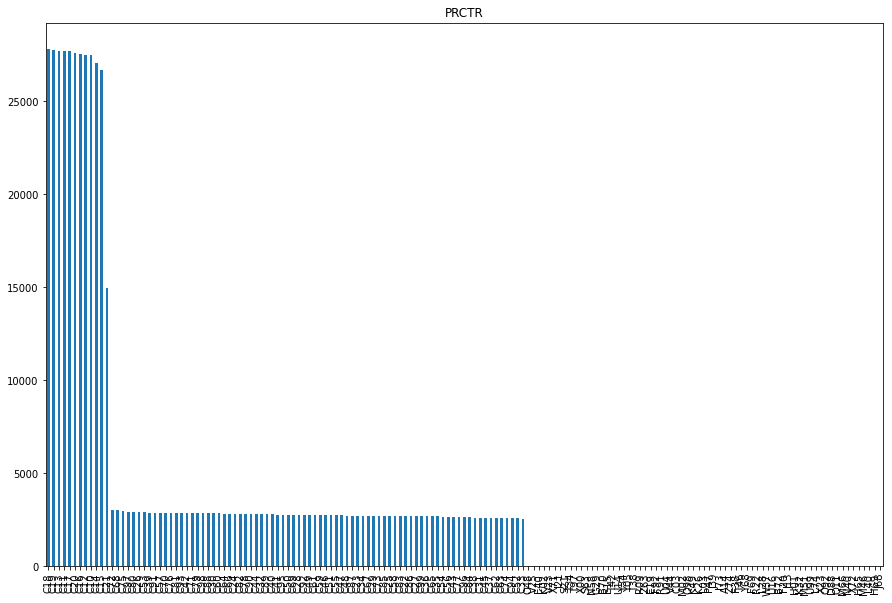

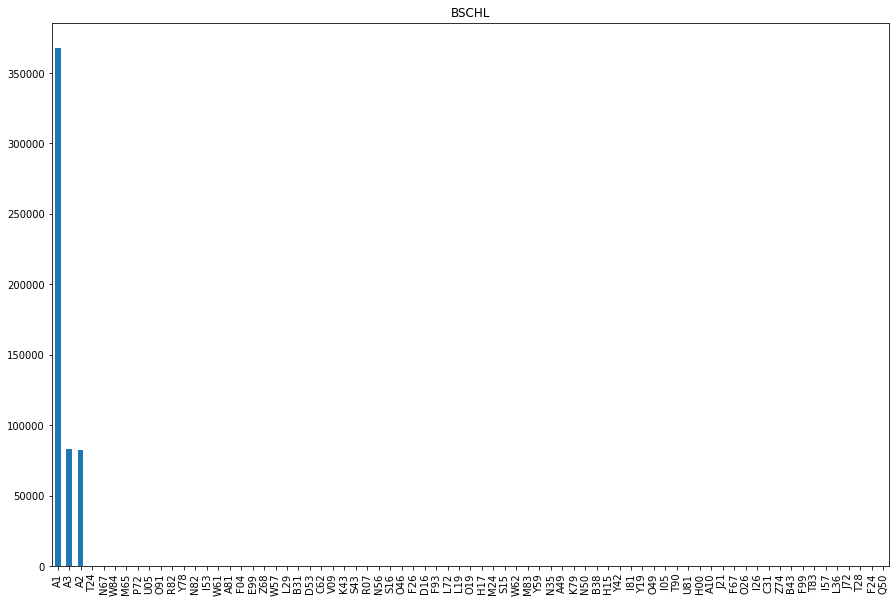

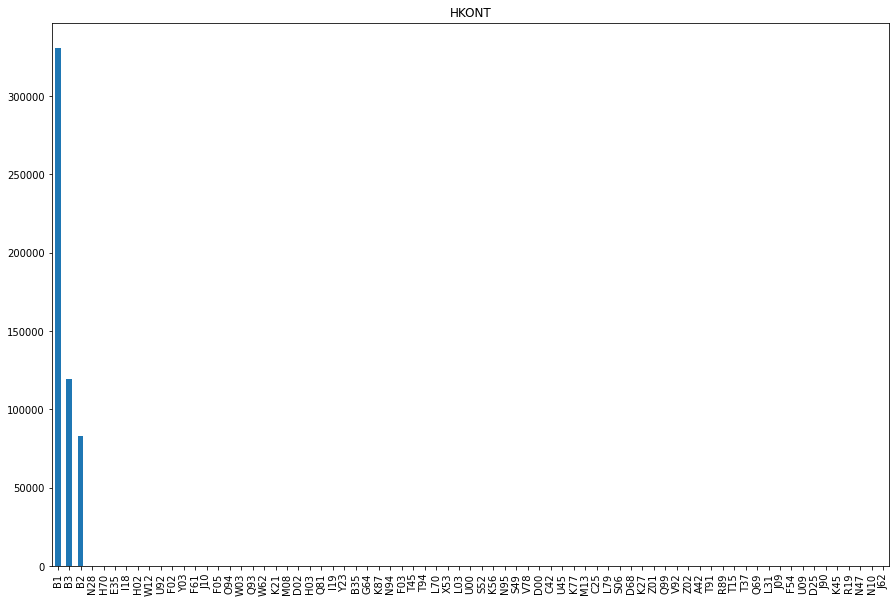

In [432]:
frequencies = []
for col in categorical_variables.columns:
    categorical_variables[col].value_counts().plot(kind='bar',figsize=(15, 10))
    plt.title(col)
    plt.show()

Many categorical variables can be threated as discrete, or continuous (in case of a vast amount of labels on a discrete variable). This discretization happens due to the large amount of labels in each variable, therefore, we can simply integer encode this variables and threat them as discrete/continuous. Regarding the others we can one hot encode them.

### The predictive variable (Labels)

I like to gain some knowledge about the dataset, analysing the labels. This step helps to understand and distinguish an anomalous behaviour from a regular one.
For this step I ask myself: 
   - What causes na anomaly?
   - What are the variables that have a major impact on anomalies?
       - Do they impact directly the decision? Do they need any externel contribute from others to cause an anomaly?
   - What should I expect (according to the data that I have) to be a regular behaviour?

In [ ]:
# Let's inspect some anomalies
anomaly_df = df[(df['label']=='global') | (df['label']=='local')]
anomaly_df.head(20)

In [444]:
grouped = df.groupby('BUKRS')['label'].agg(['min', 'max', 'count', 'nunique'])
grouped.sort_index(ascending=True).head(10)

,min,max,count,nunique
BUKRS,,,,
A43,global,global,1,1
A89,global,global,1,1
B37,global,global,1,1
B76,global,global,1,1
C10,regular,regular,27311,1
C11,local,regular,27248,2
C12,regular,regular,27452,1
C13,global,regular,27775,2
C14,regular,regular,27582,1
